# Assignment 1

This assignment is done as a part of the course 02806 Social Data Analysis and looks into a dataset describing Police incident reports from 2003 to may 2018.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
# matplotlib options
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## Part 1: Temporal Patterns

In this exercise we will focuse on patterns over time for the 14 ``focuscrimes``. 

In [3]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [4]:
## Import the data
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,POINT (-122.476327815126 37.7196874952717),11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,POINT (-122.411339562557 37.7812707434494),9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,POINT (-122.435187699349 37.7626702770872),13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,POINT (-122.421886357981 37.7649178909424),8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,POINT (-122.413935404044 37.7516932889916),7053577015200


### Weekly patterns 

Initially we will look at the patterns over a weekly basis, from monday to sunday.

In [5]:
# dataframe with only the focus crimes
temp = df[df['Category'].isin(focuscrimes)]
# groupby category and day of week
temp = temp.groupby(['Category','DayOfWeek']).count().X.unstack()
# Arrange the dataframe so the weekday match the order of the week
temp = temp[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

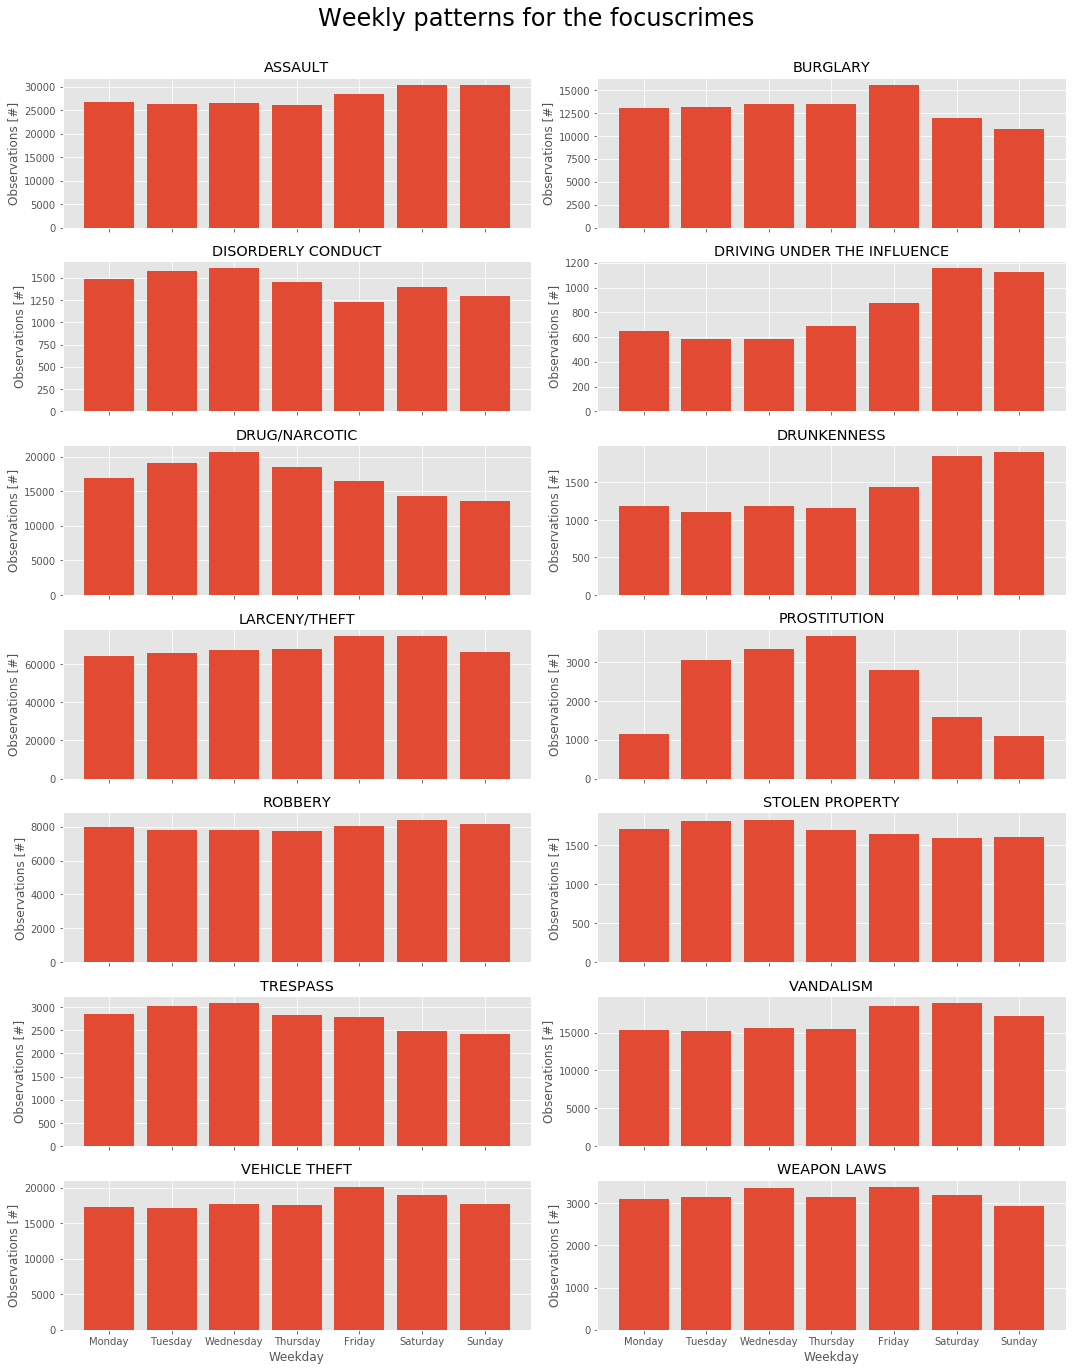

In [6]:
# Define names of crimes
crimes = temp.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)
# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
p = 0

for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(temp.loc[crimes[p]].index,temp.loc[crimes[p]].values)
        axs[i,j].set_title(crimes[p])
        axs[i,j].set_ylabel('Observations [#]')
        p +=1

# Specify x axis label
axs[6,0].set_xlabel('Weekday')
axs[6,1].set_xlabel('Weekday')
# Title for subplot
plt.suptitle('Weekly patterns for the focuscrimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From the plot several interesting patterns can be seen.
- ``DRIVING UNDER THE INFLUENCE`` and ``DRUNKENNESS`` peaks during the weekend which is as expected.
- ``BURGLARY`` has its peak during friday which might be because many people go out on fridays and many homes are left empty.
- ``PROSTITUTION`` peaks during mid week which is rather unexpected.
- ``DRUG/NARCOTIC`` peaks during wednesday and is at its lowest during the weekend.

### The months (yearly patterns)
To check if some months are worse than others, the yearly pattern is plotted for all focuscrimes.

In [7]:
# Convert the date and time to datetime
df['Datetime'] = pd.to_datetime(df['Date']+ ' ' + df['Time'])

In [8]:
# Make a new column specifying the month 
df['month'] = df['Datetime'].dt.month
# Dataframe with only the focus crimes
temp = df[df['Category'].isin(focuscrimes)]
# Group the data by category and month
temp = temp.groupby(['Category','month']).count().X.unstack()

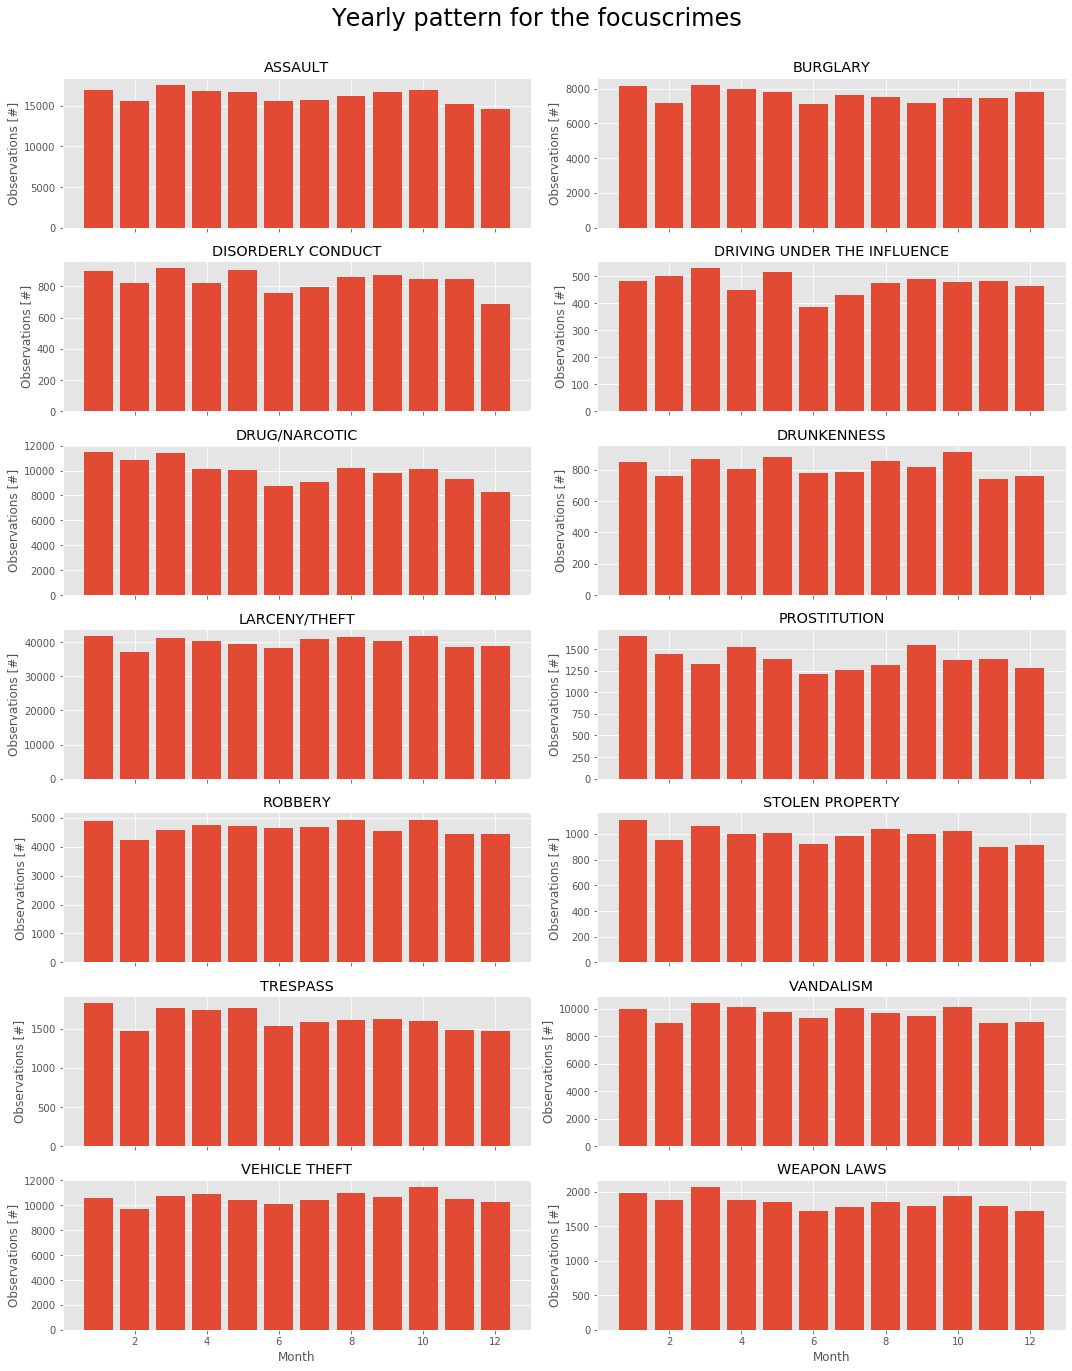

In [9]:
# Define names of crimes
crimes = temp.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)
# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
p = 0

for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(temp.loc[crimes[p]].index,temp.loc[crimes[p]].values)
        axs[i,j].set_title(crimes[p])
        axs[i,j].set_ylabel('Observations [#]')
        p +=1
        
# Specify x axis label
axs[6,0].set_xlabel('Month')
axs[6,1].set_xlabel('Month')
# Title for subplot
plt.suptitle('Yearly pattern for the focuscrimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From these plots it can be seen that most crimes appear to be at around the same level through out the year. Some categories like ``DRUG/NARCOTIC`` do however have fewer crimes during the summer months and december. This could be due to people being on holidays and thereby generally fewer people around.

### 24 hour cycle 
To get an idea of if a crime happens during a specific time of the day, the crimes are plotted over a 24 hour cycle.

In [10]:
# Column with the recorded hour of the crime
df['hour'] = df['Datetime'].dt.hour
# Dataframe with only the focus crimes
temp = df[df['Category'].isin(focuscrimes)]
# Group the data by category and month
temp = temp.groupby(['Category','hour']).count().X.unstack()

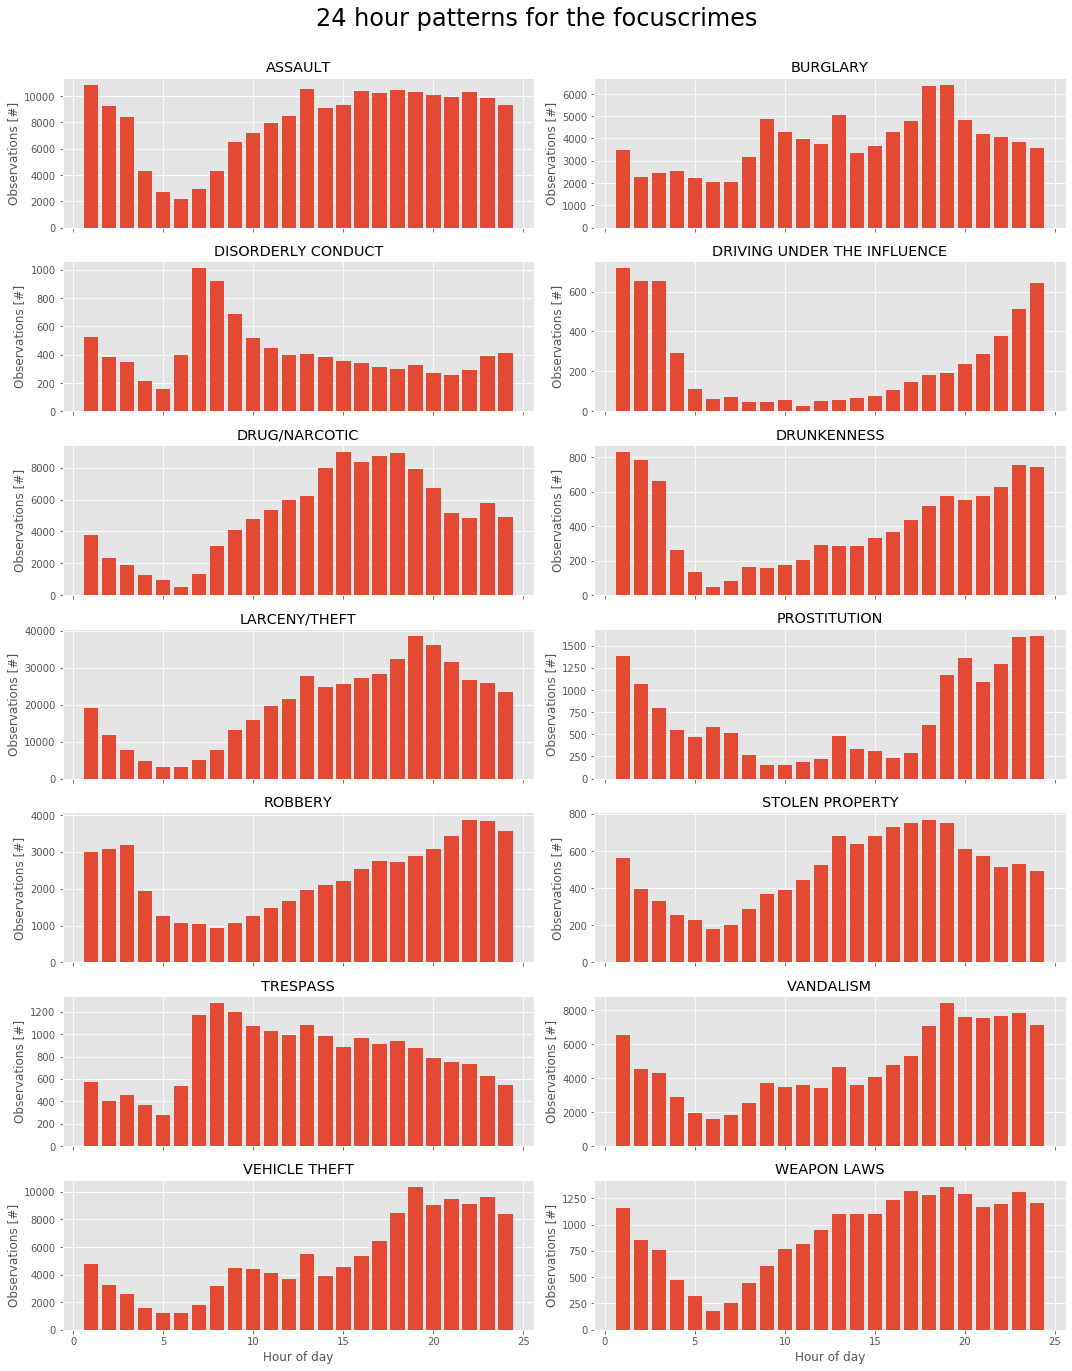

In [11]:
# Define names of crimes
crimes = temp.index
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)
# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
p = 0

for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(temp.loc[crimes[p]].index+1,temp.loc[crimes[p]].values) # add 1 so it matches the real hour
        axs[i,j].set_title(crimes[p])
        axs[i,j].set_ylabel('Observations [#]')
        p +=1
        
# Specify x axis label
axs[6,0].set_xlabel('Hour of day')
axs[6,1].set_xlabel('Hour of day')
# Title for subplot
plt.suptitle('24 hour patterns for the focuscrimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

From these plots it can be seen that the pattern on a 24 hour cycle are very different depending on the crime type. Some of the interesting patterns are described below.
- For some of the categories such as ``DRIVING UNDER THE INFLUENCE``, ``DRUNKENNESS`` and ``PROSTITUTION`` most of the crimes happen the recorded crimes happens during the night.
- For the categories like ``DRUG/NARCOTIC``and ``LARCENY/THEFT`` it can be seen that most of the crimes happens during the day hours.
- For categories like ``TREPASS`` and ``DISORDERLY CONDUCT`` the peak amount of crimes is in the morning whereafter less crimes appear through out the day.

### Hours of the week 
Lastly it is interesting to see if the 24 hour cycle changes chrough out the week. Therefor all crimes are plotted for the 168 hours of the week.

In [12]:
temp = df[df['Category'].isin(focuscrimes)] #creating a dataframe that only contains focus crimes 
temp = temp.groupby(['Category', 'hour','DayOfWeek']).size() #group by category and year_of_crime
temp = temp.unstack().unstack() #using unstack a couple of times so it will be turned to the correct dataframe
temp = temp[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

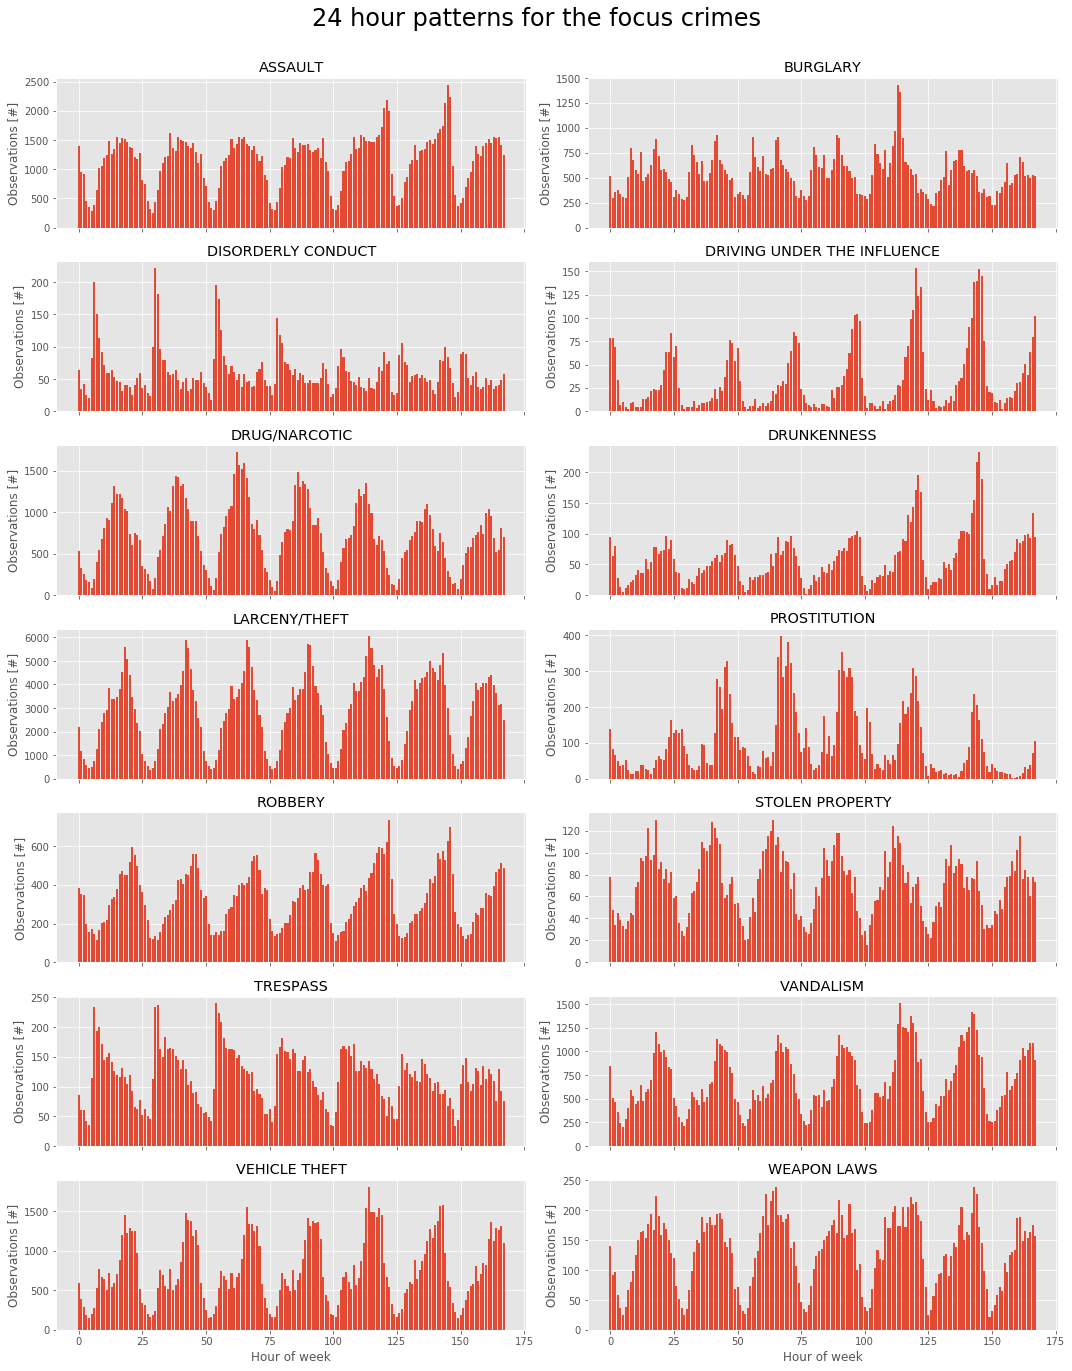

In [13]:
# Figure size
plt.rcParams['figure.figsize'] = (15, 20)

# Initialize the figure
fig, axs = plt.subplots(7, 2, sharex='col')
ind = temp.index 
p = 0
for i in range(0,7):
    for j in range(0,2):
        axs[i,j].bar(range(0,len(temp.loc[ind[1]].index)),temp.loc[ind[p]].values);
        axs[i,j].set_title(ind[p])
        axs[i,j].set_ylabel('Observations [#]')
        p+=1

# Specify x axis label
axs[6,0].set_xlabel('Hour of week')
axs[6,1].set_xlabel('Hour of week')
# Title for subplot
plt.suptitle('24 hour patterns for the focus crimes', size = 24)
# Ensures a nice and thight layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plots above show similar patterns on a daily basis as the plots for a 24 hour cycle. However, the amount of observations differ through out the week for certain crimes, and some crimes have large spikes in observations. Below some of the interesting crimes are described.
- ``DISORDERLY CONDUCT`` has a similar pattern through out the week, but it has some very large spikes from monday to wednesday in the early hours of the day.
- ``BURGLARY`` has large spikes for 2 hours during friday.
- ``PROSTITUTION`` has some very large spikes during the middle of the week. 

## Part 2: Thinking about data and visualization
### Questions for the first video

#### What is the difference between data and metadata?
Data can be some information or a list of observations where metadata is some informations about the data which helps us understand our data better. With regards to the bike-example we had our raw data, which was simply the *messy* datafile, and we add some context, some metadata, by looking at the bike route through for example google earth.

#### Sune says that the human eye is a great tool for data analysis. Do you agree?
The human eye is a great tool for data analysis as it is capable of detecting trends and tendencies very quickly and is even capable of finding specific patterns in a large and complex system (like in 'Where's Waldo?'). It does however have its limitations when the amount of information becomes too wast and large. Imagine if you had a 'Where's Waldo?' at the size of DTU campus, it would be allmost impossible to find Waldo by human eye and would need a lot of structuring to succeed. 
As mentioned in DAOST the human eye is good at comparing height but has trouble when comparing areas. 

#### Example of Simpsons's paradox
Let's say that you want to go out to get a good Dürum at Nørrebro with your friend. This can be very tricky as there are almost as many Dürum places as people within Nørrebro, so deciding on one can take ages. To make it easier you decide that both you and your friend should find a Dürum place with good reviews online and then you will simply pick the one with the best reviews, sounds easy right? 

You find a Dürum place called Dürumsymfonien which is recommended by a higher percentage of both men and woman than your friends Dürum place, Dürumbar. Just as you are about to lace up your shoes, your friend, using the exact same data, finds that Dürumbar is recommended by a higher percentage of all users, so it is clearly the winner. As you are very hungry you decide to just eat a Dürum from both places and figure out what the heck is going on when you come back home with a full belly. 

Upon arriving home your realize that you had entered the Simpson's Paradox, where both Dürum places can be better and worse than eachother, where a dataset can be used to prove two opposing arguments. Below the reviews of the two Dürum places are showed.

| | Dürumbar | Dürumsymfonien |
|---|---|---|
|Male | 30/100 = 30% |100/200 = 50% |
|Female | 200/250 = 80% | 125/150 = 83% |
|Combined | 230/350 = 66% | 225/350 = 64%|

The problem appears as the amount of reviews within each category is not accounted for. Dürumbar has a lot more reviews from females than Dürumsymfonien and Dürumsymfonien has a lot more reviews from males than Dürumbar.

(inspiration for this exampled is gathered from https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9)

#### Difference between exploratory and explanatory data analysis
Doing exploratory data analysis is all about structuring and visualizing the data to try to understand what data you have, and what interesting stories and evidence may lie hidden in the data. Explanatory data analysis on the other hand is about visualizing the data for an audience, showing what was found in the exploratory analysis in a understandable way. The difference can be seen as the difference between doing an presentation and all the hard work which lies behind it, where the presentation is the explanatory analysis and all the notes, calculations, litterature reading etc., which is only for once self, is the exploratory data analysis.

### Questions for the second video lecture

#### Explain how the Pearson correlation works and write down its mathematical formulation. Can you think of an example where it fails (and visualization works)?
Pearson correlation is a technique that is used to finde the relation between two variables. The correlation is repressented by a value between -1 and 1, where 1 is repressenting high correlation and -1 inverse coorelation. High correlation is also referred to as direct correlation (e.g. if one variable is increasing in value, the other will also increase). If there is no correlation at all the value turns to 0. The Pearson corelation can also be used to detect outliers. 

In the formula below it is stated how the correlations are calculated:

$ r_{x,y} = \frac{n  \sum x_i  y_i  \sum x_i \sum y_i}{\sqrt{n  \sum x_i^2-(\sum x_i)^2} \sqrt{ n  \sum y_i^2-(\sum y_i)^2}}$ 

Where $n$ is the sample size, $x_i$ and $y_i$ individual sample points indexed with $i$.

The correlation can however fail if you are aggregating the correlations to much, e.g. if you within two different group of the population in the sociaty are experiencing an direct correlation, by aggregating and now only consider the population as one group it can turn out that you will have an inverse correlation. 

#### What is the difference between a bar-chart and a histogram?
A bar-chart visualize the value of given indputs, where for the histogram defined bins will be made and then all values that fall with in each bin will be counted. It is then the counts for each bin that will be visualized and not the values. 

#### How do you find the right bin-size for a histogram?
By a google search, [see here](https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/), it is found that a good bin-size is estimated by taking the squareroot of the amount of data points and the round up the value, to the nearest integer number. DAOST suggests following Scott's rule which evaluates the number of bins based on a bin size given as: 
$$width=3.5\cdot \frac{\sigma}{\sqrt[3]{n}}$$


## Part 3: Generating important plot types
#### Jitter-plot based on SF Police data arrest times. 
Below a jitter-plot of the minutes an arrest is registered for the crime category ``ASSAULT`` on the between hour 13 and 14   each day between the 1st of January 2015 and the 1st of July 2015.

In [14]:
df['minutes'] = df['Datetime'].dt.minute
tempMinutes = df[(df['Category']=='ASSAULT')&(df['Datetime']>'2015-01-01')&(df['Datetime']<'2015-07-01')&(df['hour']==13)]
tempMinutes.index=range(len(tempMinutes))



Text(0, 0.5, 'Observation ID [#]')

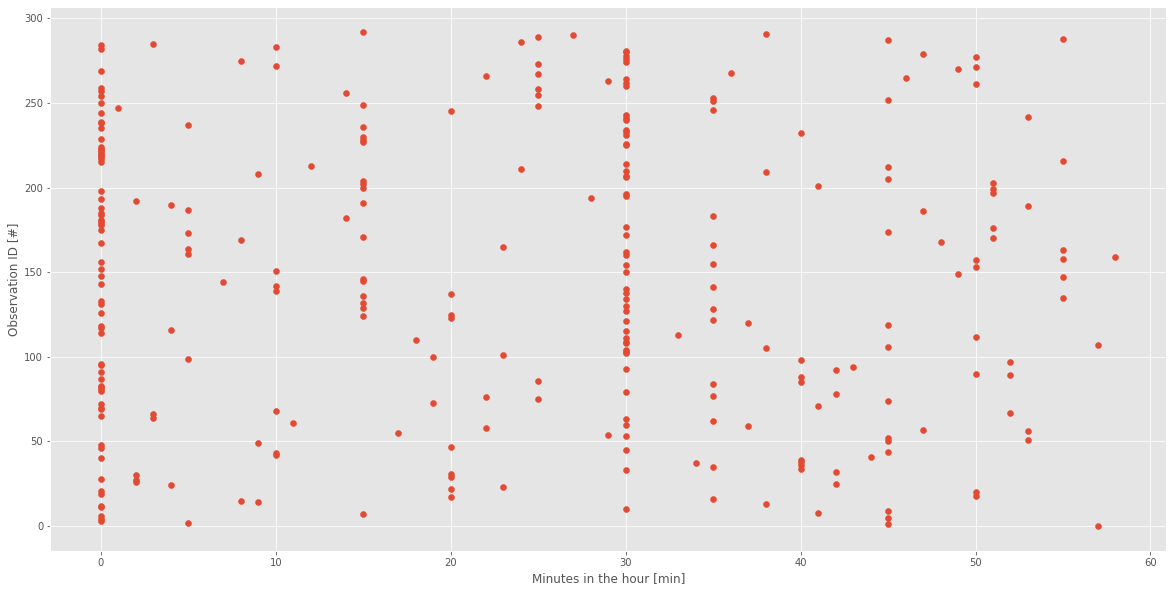

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(tempMinutes['minutes'],tempMinutes.index,marker='o')
plt.xlabel('Minutes in the hour [min]')
plt.ylabel('Observation ID [#]')

#### Histogram based on SF Police data arrest locations.
Below a histogram of the latitudes of the set of crimes that occured between the 1st of January 2013 and the 1st of april 2015 that are either in the category ``TRESPASS`` or ``WEAPON LAWS``. The data is plotted using 50 bins.

Afterwards the each individual category is plotted on top to show the contribution to the total which is seen in red.

``WEAPON LAWS`` can be seen in blue 

``TRESPASS`` can be seen in green

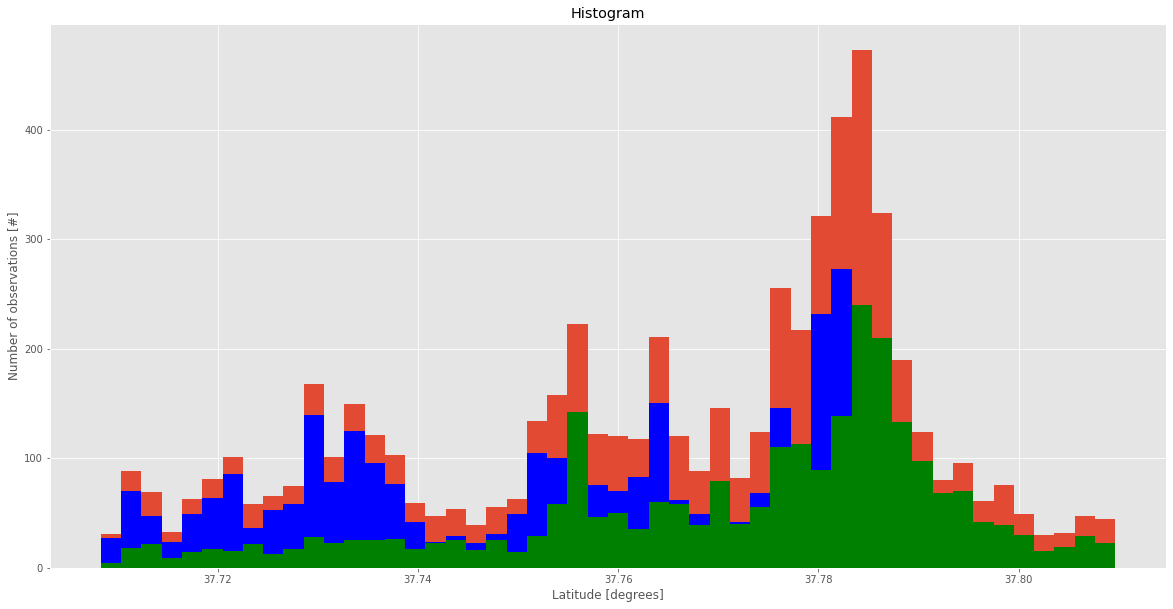

Number of points in plot is:  6105


In [16]:
crime1='WEAPON LAWS'
crime2='TRESPASS'


temp1 = df[(df['Category'].isin([crime1,crime2]))&(df['Datetime']>'2013-01-01')&(df['Datetime']<'2015-04-01')]
temp2 = df[(df['Category'].isin([crime1]))&(df['Datetime']>'2013-01-01')&(df['Datetime']<'2015-04-01')]
temp3 = df[(df['Category'].isin([crime2]))&(df['Datetime']>'2013-01-01')&(df['Datetime']<'2015-04-01')]
a,binsHist=np.histogram(temp1.Y,50)
plt.figure(figsize=(20,10))
plt.hist(temp1.Y, bins =binsHist) 
plt.hist(temp2.Y,bins=binsHist,color="blue")
plt.hist(temp3.Y,bins=binsHist,color="green")
plt.title("Histogram") 
plt.xlabel('Latitude [degrees]')
plt.ylabel('Number of observations [#]')
plt.show()
print("Number of points in plot is: ",len(temp1))

#### Kernel density plot based on SF Police data arrest times.
Below a Kernel Density plot of the same data as seen in the jitter plot can be seen. 


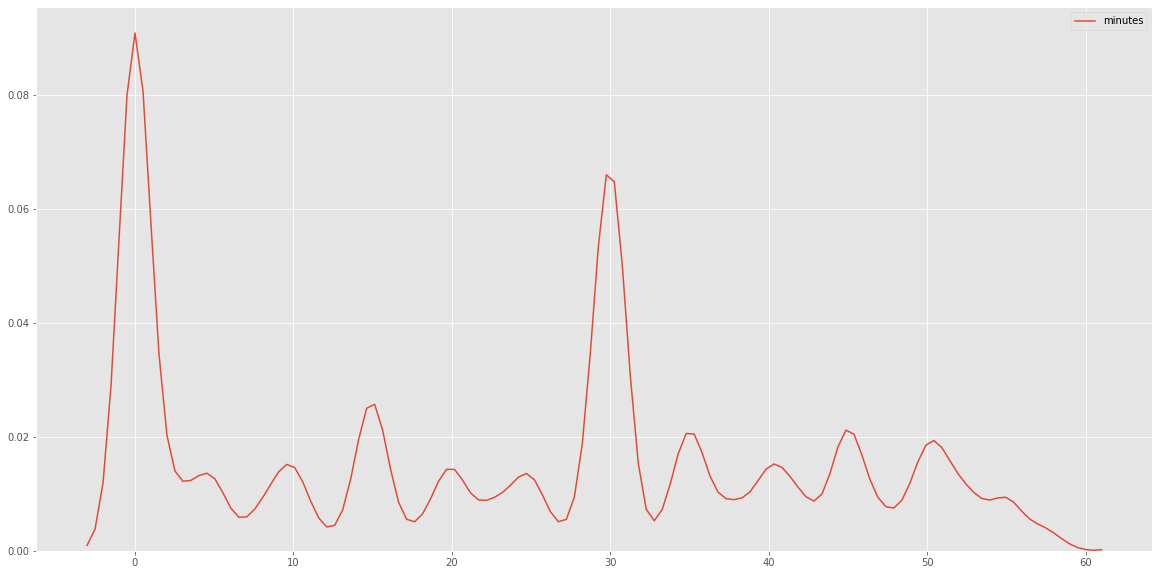

In [17]:
plt.figure(figsize=(20,10))
sns.kdeplot(tempMinutes['minutes'], bw=1);

#### Kernel density plot based reduced on SF Police data arrest locations.
Below a Kernel Density plot of the same data as seen in histogram can be seen.
It shows that a lack of data points can lead to a wrong representation that portraits a nice distribution.


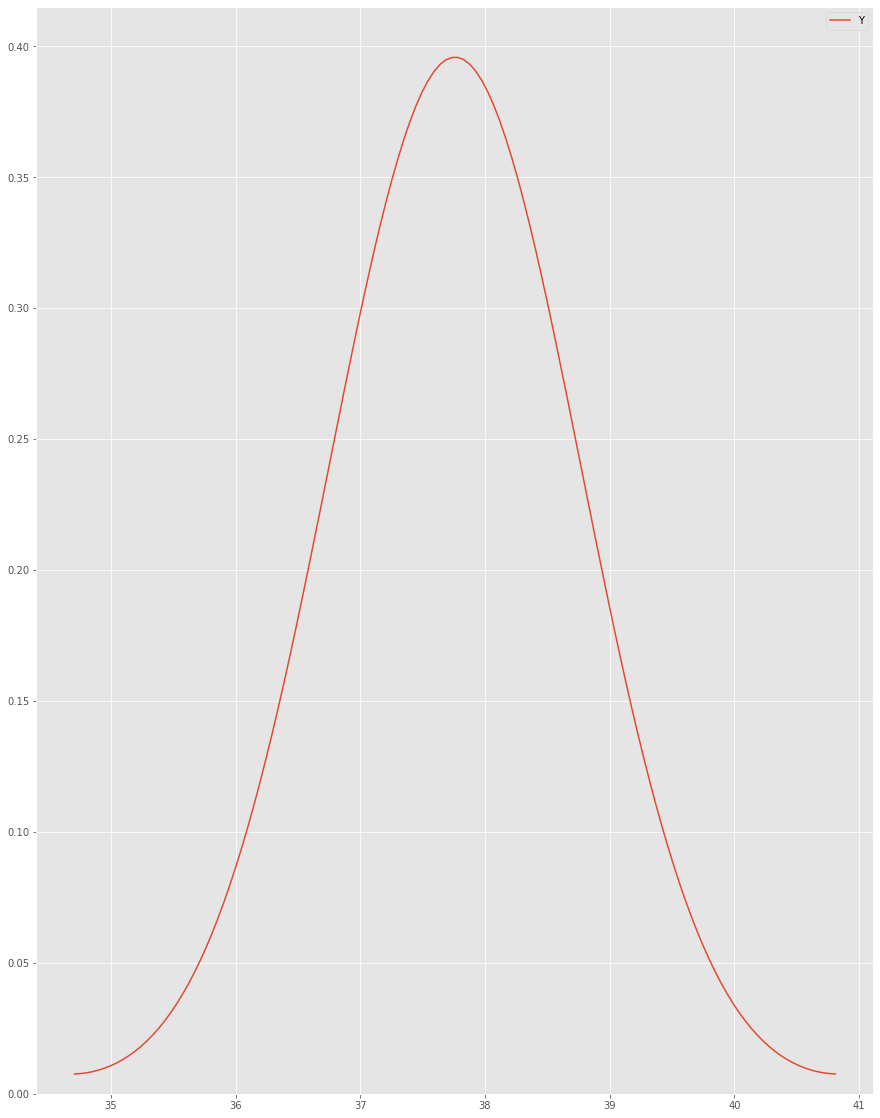

In [18]:
indexTemp=rnd.randint(0,len(temp1)-25)
temp25=temp1[indexTemp:indexTemp+25]
sns.kdeplot(temp2['Y'], bw=1)

## Part 4: Heatmaps of geo-data

In [19]:
#This part of the notebook is computed with inspiration from: 
#https://www.kaggle.com/daveianhickey/how-to-folium-for-maps-heatmaps-time-data

import folium

We are now studying geospectral data by plotting raw data points and heatmaps using the package folium.

First start by plotting a map of San Francisco with a nice tight zoom. 

In [20]:
# Generating the folium map
map_SF = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)  
                                                    # the map type can be changed to different styles: 
                                                    # tiles_list = ["Stamen Terrain", "Stamen Toner", "Mapbox Bright"]
# Display the map
map_SF 

If the Map is not showing a picture of it can be found here: https://github.com/KristianBreddam/02806/blob/master/Assignment1/1folium.png

Next, the coordinates for SF City Hall 37.77919, -122.41914 is used to indicate its location on the map.

In [21]:
folium.Marker([37.77919, -122.41914], popup='City Hall').add_to(map_SF) #pop-up marker is added to the map
map_SF

If the Map is not showing a picture of it can be found here: https://github.com/KristianBreddam/02806/blob/master/Assignment1/2folium.png

### Point scatter plot:

Now, let's plot some more data (no need for popups this time). Select a couple of months of data for 'DRUG/NARCOTIC' and draw a little dot for each arrest for those two months. We can call this a kind of visualization a point scatter plot.

The year 2017 is chosen, and the month February and March will be investigated in the below point scatter plot.

In [22]:
# Rename full dataset
data = df

# Category of interest
temp = data[data['Category'] == 'DRUG/NARCOTIC']

In [23]:
# Selecting to work with only two months
temp_febmar_17=temp[(temp['Datetime']>='2017-02-01 00:00:00') & (temp['Datetime']<'2017-04-01 00:00:00')]

# Print size of new dataset
print('Number of observations in february and march 2017:', temp_febmar_17.size)

Number of observations in february and march 2017: 9843


In [24]:
# Generating a new the folium map
map_SF = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)  

# Adding points ontop of the map
[folium.CircleMarker(
                     location=[temp_febmar_17['Y'].iloc[i] , temp_febmar_17['X'].iloc[i]], #Given all relevant coordinates 
                     radius=1, #setting the radius of the marker to 1
                     color='#0080bb') #selecting the prefered color of the datapoints
                     .add_to(map_SF) #adding the points to the map
                     for i in range(len(temp_febmar_17))] # adding all the point by using a for-loop

# Plotting the map and scatter points
map_SF

If the Map is not showing a picture of it can be found here: https://github.com/KristianBreddam/02806/blob/master/Assignment1/3folium.png

The observations from the two selected months are plotted as blue point on the above scatter point plot. It is here easy to get an overview of where the crimes were commited. 

### Heatmap:

To create your first heatmap, grab all arrests for the category 'SEX OFFENSES, NON FORCIBLE' across all time. Play with parameters to get plots you like.


In [25]:
from folium import plugins
from folium.plugins import HeatMap

map_SF1 = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)

# Ensure you're handing it floats
temp['X'] = temp['X'].astype(float)
temp['Y'] = temp['Y'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
temp_heat = df[df['Category'] == 'SEX OFFENSES, NON FORCIBLE'] # Reducing data size so it runs faster
temp_heat = temp_heat[['Y', 'X']] 

# List comprehension to make out list of lists
df_heat = [[row['Y'],row['X']] for index, row in temp_heat.iterrows()]

#Plot it on the map
HeatMap(df_heat, radius=15, blur=15).add_to(map_SF1) 

# Display the map
map_SF1

C:\Users\Krist\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Krist\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


If the Map is not showing a picture of it can be found here: https://github.com/KristianBreddam/02806/blob/master/Assignment1/4folium.png

Now some of the parameters will be changed to illustrate the visualize difference it make on the heatmap even the same data points are used.

In [26]:
# Changing some of the parameters 
map_SF2 = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)

# Plot it on the map
HeatMap(df_heat, radius=15, blur=24, max_zoom=10, min_opacity=2).add_to(map_SF2) 

# Display the map
map_SF2

If the Map is not showing a picture of it can be found here: https://github.com/KristianBreddam/02806/blob/master/Assignment1/5folium.png

#### Now, comment on the differences between scatter plots and heatmaps.
    * What can you see using the scatter-plots that you can't see using the heatmaps?
    * And vice versa: what does the heatmaps help you see that's difficult to distinguish in the scatter-plots?

> The scatter plot show the exact locations for the crimes, all crimes are weighted equally with the same size and color point. If you zoom in or out of the view scatter points will always stay the same size irrelevant of the view. However a heatmap will change in expression and coloring, as some observations may interact with eachother when zooming out.

> The heatmap on the other hand, makes it easier to see when more observations are clustered close together. Instead of just adding another point on top of one another as in the scatter plot, the heatmap varying in color and size to esially illustrate a local epicenter for that specific crime.

#### Play around with the various parameter for heatmaps. Comment on the effect on the various parameters for the heatmaps. How do they change the picture? Information is found in a list here: https://python-visualization.github.io/folium/plugins.html

> All the parameters have been investigated, to see how the influence the picture. However there will only in the following be commented on the parameters radius, max_zone and blur as the were used to create the heatmap above.

> Radius: Influence how large an area one datapoint should represent when plotted on the heatmap, the bigger the radius it will have an higher change of interacting with datapoint nearby and result in a stronger the coloring on the map.

> Max_zoom: It is the zoom level where the points reach maximum intensity.

> Blur: Change the colorboundary of the observations. A value close to 1 will make the boundary of an observation more strict (no faded boundary), where a high value will fade out the boundaries more slowly.

### Detective skills


![maps](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/crime_hot_spot.png)

#### In the screenshot above, there is (manually) highlighted a specific hotspot for this type of crime. Use your detective skills to find out what's going on in that building on the 800 block of Bryant street ... and explain in your own words.

> By doing a detective google search on 'San Francisco bryant street' the second [link](https://www.sfsuperiorcourt.org/general-info/directions/hall-of-justice?__cf_chl_captcha_tk__=fcd1a9e036de37ba1426b1852bf947afd82bb0bf-1582849405-0-AT4IlX0ZXdzRnJfVHQbac5Swq1bZ5BHhaJxGEXYLew0WYPIGj3hpR0GnJ9qoHNIQl991lls97EwKSymh509lmbjDCqiC-an6ESBb3ifbtUWmU6zTfWv6GF53rXmtKgaARlEdkQkZCde-GKqUb-GZXK5SPXmwShC8ajwNhnVG3pDfujkQ5lqsBCO41pnynS_QG9iFfdbeC14qgbFas625nv7jGQD9LP6ibLiHY_CGDfISy6jzkkQV7LeuE5L7_NErMh4RxntPWT7ozGXr9jeaVdc01L2oo8Yh6HeTY9m0xJDmzZ3JVw8VSc_9c86GYr2Pl4xSHL-aYTo1BDkh-UDYktt6AuXxCFo82zdF2d1JSWN9T7PqLMOHI09x7XRum2hkT6mJJ39T7P5c0s-rvUDDQpVXVu3SsNUbvL2d_P94GEak7m25BKZ2jF-qq3EPzsnL8HPib31at6C19o-1D7hJA2e_AZmbzDKmdhkX8aUmNGW_n4YYeeNW15m1DRv0W_MWXQ) was sending us directly to the Hall of Justice webpage, more precise the Superior Court of California. It is placed on 850 Bryant St., which fits perfect to the highlighted spot on the screenshot. This could be because of the police force in San Francisco always needs to place a location for the crime, and they could have the hall of justice as a dummy location, if nothing else is stated.

### Heatmap movies

The crimetype ``DRIVING UNDER THE INFLUENCE`` is chosen to be investigated further with a heatmap movie. This crimetype is chosen because of the interesting pattern explored in the weekly hour plot in Part 1 and from data-exploration in lecture 3.

A time resolution is now determined. Both years, months and days were investigated, however it ended up being a hours of the day that is illustrated in the movie below.


#### What patterns does your movie reveal? Motivate/explain the reasoning behind your choice of crimetype and time-resolution.

In [27]:
from folium import plugins

map_SF = folium.Map([37.773972, -122.431297],tiles = "Stamen Toner", zoom_start=13)

# Ensure you're handing it floats
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
temp = df[df['Category'] == 'DRIVING UNDER THE INFLUENCE'] # Reducing data size so it runs faster
temp_heat = temp[['Y', 'X']] 

# Create weight column, using date
# Hour per day
temp_heat['Weight'] = temp['Datetime'].dt.hour
temp_heat['Weight'] = temp_heat['Weight'].astype(float)

# List comprehension to make out list of lists
# Hourly heatmap time
df_heat = [[[row['Y'],row['X']] for index, row in temp_heat[temp_heat['Weight'] == i].iterrows()] for i in range(24)]

# Plot it on the map
hm = plugins.HeatMapWithTime(df_heat,auto_play=True,radius=18, index_steps=1) 
#Parameter: index_steps = steps (hours, days, months, years) it will jump when you plays
hm.add_to(map_SF)

# Display the map
map_SF

C:\Users\Krist\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Krist\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


If the Map is not showing pictures of it can be found here: 

https://github.com/KristianBreddam/02806/blob/master/Assignment1/61folium.png

https://github.com/KristianBreddam/02806/blob/master/Assignment1/62folium.png

https://github.com/KristianBreddam/02806/blob/master/Assignment1/63folium.png

https://github.com/KristianBreddam/02806/blob/master/Assignment1/64folium.png

https://github.com/KristianBreddam/02806/blob/master/Assignment1/65folium.png

> In the above heatmap movie is it easy to see how the crimes commited in the category ``DRIVING UNDER INFLUENCE`` is focused around mitnight. It drops to a low in frame 6 (6 AM) and stay there till frame 17 (5 PM) where it rises again in towards the evening. The map also reveals that it is highly centeret around some main routes and intersections mainly in downtown and down Geary Boulevard (west) and Columbus Avenue (north-east). The time resolution has been set over the hours of a day, as it has been seen in previous exploration of the data that the amount of crimes concerning ``DRIVING UNDER INFLUENCE`` varied a lot depend hours of the day. It could also be interesting to illustrate it in hours of the week, to see if there is difference between weekdays and weekends. 

# Part 5: Errors in data

- 1. In the first example one could be tempted to simply think that maybe there simply are many people who uses prostitution on Wednesday at a specific time. However if we think about how the reality is this might not be the case, it could be that the police officers sometimes just put a date in the middle of the week if they forgot when they made an arrest. This therefore proves that one cannot blindly trust the data but has to look at the results with some scepticism.

- 2. In the second example it becomes clear that the police officers do not note the excat time of a crime but often will round to the nearest 15 minutes. For this data it would therefore not be meaningfull to look at the data a a lower level than the hour.

- 3. The third example illustrates that the police officers might forget the location of a crime and therefore often just note the 'Hall of Justice' as a default.

All three examples show that how you bin the data will have a huge impact on what will become apparent from the data and that exploring different bin sizes can prove to reveal new information from the data. 